In [253]:
import sklearn


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [255]:
import src.datasets as datasets
import src.surrogate as surrogate
import src.search as search

In [256]:
load_data_func = getattr(datasets, f'cement_data')
X_train, X_test, y_train, y_test = load_data_func('./data/concrete_processed.csv')

load_data_loader_func = getattr(datasets, f'lightgbm_load_data')
train_loader, val_loader = load_data_loader_func(X_train, X_test, y_train, y_test)

train_func = getattr(surrogate, f'lightgbm_train')
model = train_func(train_loader, val_loader)


/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


Training until validation scores don't improve for 50 rounds
[100]	train's rmse: 0.0448095	valid's rmse: 0.0588017
[200]	train's rmse: 0.0342117	valid's rmse: 0.0521947
[300]	train's rmse: 0.0290689	valid's rmse: 0.050235
Early stopping, best iteration is:
[305]	train's rmse: 0.0288801	valid's rmse: 0.0501455


In [257]:
df = pd.read_csv('k_means_search_0.csv')

# df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'fitness']



In [258]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', 'fitness'], dtype='object')

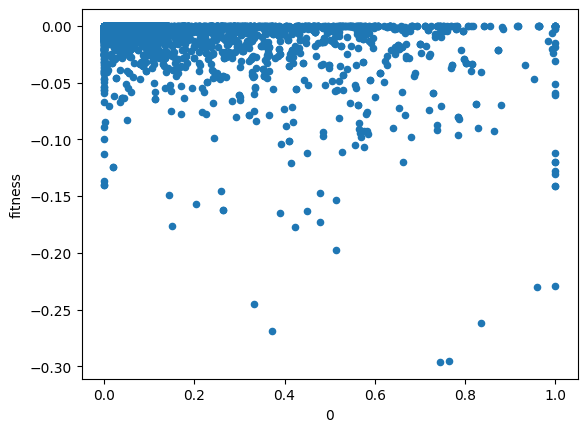

In [259]:
df.plot(x='0', y='fitness', kind='scatter')
plt.show()

In [260]:
gt_y = y_test[0]

In [261]:
gt_x = X_test[0]

In [262]:
gt_x

array([0.10730594, 0.40631394, 0.54472764, 0.65346535, 0.27149321,
       0.26453488, 0.51470588, 0.        ])

In [263]:
X = df.to_numpy()[:,1:9]

In [264]:
y = df.to_numpy()[:,-1]

In [265]:
np.min(X,axis=0)


array([ 0.        ,  0.        ,  0.        ,  0.0029703 ,  0.        ,
        0.        ,  0.        , -1.28571429])

In [266]:
np.max(X,axis=0)

array([1.        , 1.        , 1.        , 1.        , 0.99547511,
       1.        , 1.        , 4.38095238])

In [267]:
x_min,x_max = np.min(X_train, axis=0), np.max(X_train, axis=0)

In [268]:
x_min

array([ 0.        ,  0.        ,  0.        ,  0.0029703 ,  0.        ,
        0.        ,  0.        , -1.28571429])

In [269]:
x_max

array([1.        , 1.        , 1.        , 1.        , 0.99547511,
       1.        , 1.        , 4.38095238])

In [270]:
# sklearn.decomposition.PCA(n_components=2)

In [271]:
# tsne = sklearn.manifold.PCA(n_components=2)

In [272]:
pca = sklearn.decomposition.PCA(n_components=2)

In [273]:
tsne_X = pca.fit_transform(X)

In [274]:
tsne_gt_x = pca.transform(gt_x.reshape(1,-1))

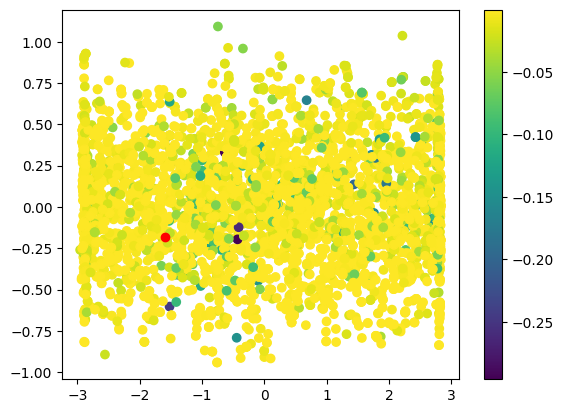

In [275]:

plt.scatter(tsne_X[:,0], tsne_X[:,1], c=y)
plt.colorbar()
plt.scatter(tsne_gt_x[:,0], tsne_gt_x[:,1], c='red')
plt.show()

In [276]:
tsne = sklearn.manifold.TSNE(n_components=2)
tsne_X = tsne.fit_transform(np.concatenate([gt_x.reshape(1,-1), X], axis=0))

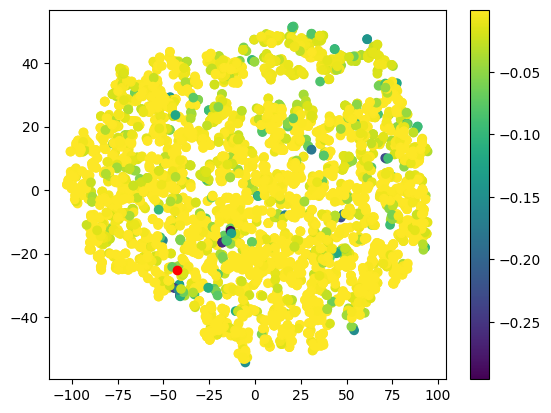

In [277]:
plt.scatter(tsne_X[1:,0], tsne_X[1:,1], c=y)
plt.colorbar()
plt.scatter(tsne_X[0,0], tsne_X[0,1], c='red')
plt.show()

In [248]:
pred_func = getattr(surrogate, f'lightgbm_predict')

In [249]:
y_pred = pred_func(model, X_test)

In [250]:
fitness = (y_pred - y_test)**2

In [251]:
fitness.shape

(186, 1)

(array([105.,  24.,  16.,   7.,   5.,   7.,   3.,   1.,   3.,   3.,   2.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          2.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.52439629e-08, 7.97891481e-04, 1.59575772e-03, 2.39362396e-03,
        3.19149019e-03, 3.98935643e-03, 4.78722267e-03, 5.58508891e-03,
        6.38295514e-03, 7.18082138e-03, 7.97868762e-03, 8.77655385e-03,
        9.57442009e-03, 1.03722863e-02, 1.11701526e-02, 1.19680188e-02,
        1.27658850e-02, 1.3563

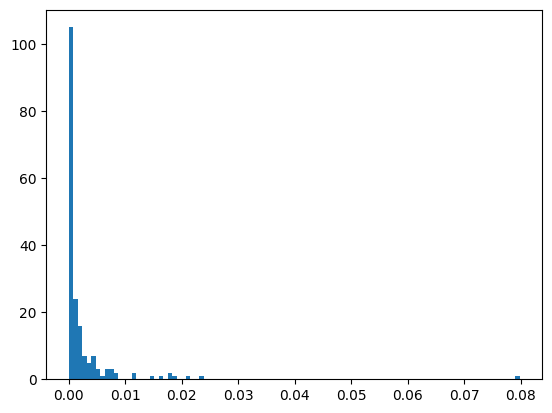

In [252]:
plt.hist(fitness,bins=100)